In [79]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
#import gc
#import tensorflow as tf

In [80]:
model = YOLO("./runs/detect/train34/weights/best.pt")
# load on NVIDIA GPU (do only if available)
model.to('cuda')

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [81]:
# define testing images
images = [
    './data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg',
    './data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg',
    './data/PKLot/PKLot/UFPR04/Rainy/2013-01-21/2013-01-21_10_25_05.jpg',
    './data/PKLot/PKLot/UFPR04/Rainy/2012-12-15/2012-12-15_16_30_13.jpg',
    './data/PKLot/PKLot/UFPR05/Rainy/2013-03-16/2013-03-16_16_40_12.jpg',
    './data/PKLot/PKLot/UFPR05/Rainy/2013-03-20/2013-03-20_18_10_14.jpg',
    './data/unseen_test/test1.jpg',
    './data/unseen_test/test2.jpg',
    './data/unseen_test/test3.jpg',
    './data/unseen_test/test4.jpg',
    './data/unseen_test/test5.jpg',
    './data/unseen_test/test6.jpg'
]


In [82]:
def predict(image_path):
    image = cv2.imread(image_path)

    # force model to use cpu even if trained on gpu with line 1 otherwise do prediction on 
    #results = model(image, conf=0.7, device='cpu') # [1, 2, 3, 5, 7], augment=True
    results = model(image, conf=0.2, iou=0.3) # [1, 2, 3, 5, 7], augment=True
    return results[0]


In [83]:
def plot_results(result, image_path):
  image = cv2.imread(image_path)
  
  print(f'{len(result.boxes)} objects recognised')
  
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if True: # class_id == 'car' or class_id == 'truck' or class_id == 'bus':
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      # print("Object type:", class_id)
      # print("Coordinates:", cords)
      # print("Probability:", conf)
      # print("---")
      
      # Split coordinates
      x1, y1, x2, y2 = cords
      
      if class_id == 'empty':
        color = (0, 255, 0)
      else:
        color = (255, 0, 0)
      
      # Draw rectangle (bounding box)
      cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

      # Put class label on the rectangle
      cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
  # Save or display the image
  plt.imshow(image, aspect='auto')
  plt.show()  # Show the image

./data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg

0: 384x640 240 emptys, 4 cars, 14.0ms
Speed: 3.6ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
244 objects recognised


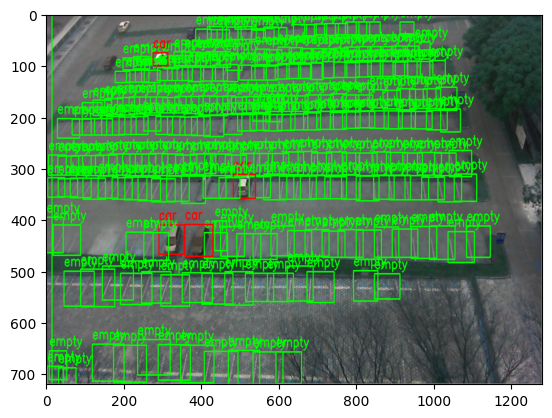

./data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg

0: 384x640 15 emptys, 192 cars, 19.8ms
Speed: 0.0ms preprocess, 19.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
207 objects recognised


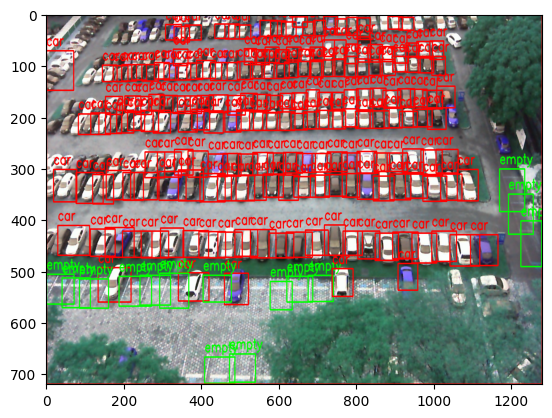

./data/PKLot/PKLot/UFPR04/Rainy/2013-01-21/2013-01-21_10_25_05.jpg

0: 384x640 1 empty, 28 cars, 15.9ms
Speed: 2.9ms preprocess, 15.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
29 objects recognised


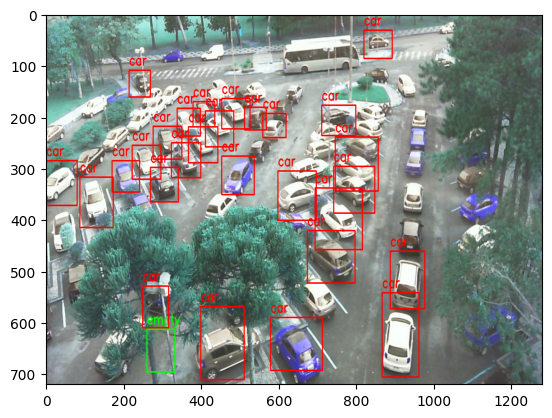

./data/PKLot/PKLot/UFPR04/Rainy/2012-12-15/2012-12-15_16_30_13.jpg

0: 384x640 21 emptys, 1 car, 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
22 objects recognised


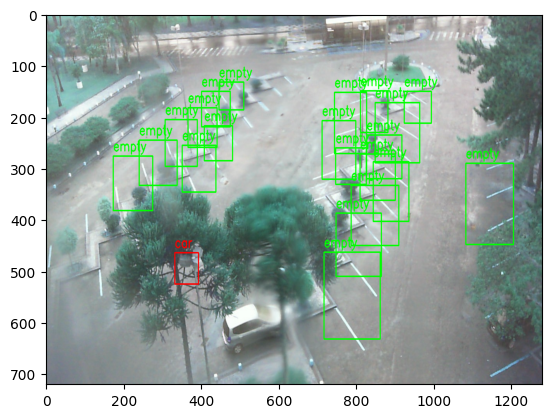

./data/PKLot/PKLot/UFPR05/Rainy/2013-03-16/2013-03-16_16_40_12.jpg

0: 384x640 37 emptys, 3 cars, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)
40 objects recognised


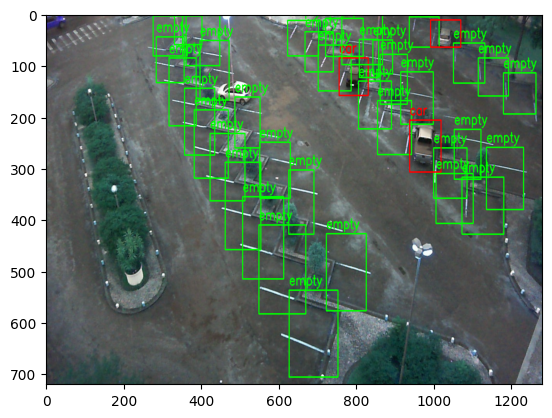

./data/PKLot/PKLot/UFPR05/Rainy/2013-03-20/2013-03-20_18_10_14.jpg

0: 384x640 8 emptys, 22 cars, 30.5ms
Speed: 0.0ms preprocess, 30.5ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)
30 objects recognised


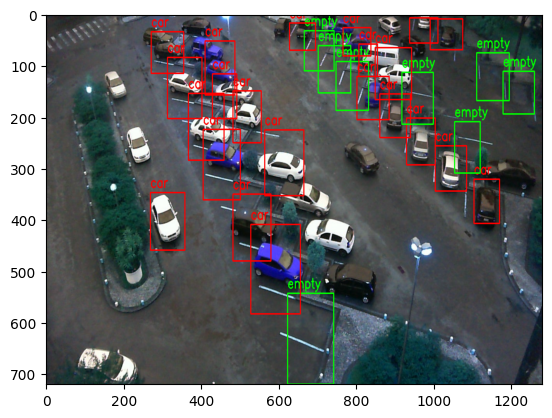

./data/unseen_test/test1.jpg

0: 384x640 56 emptys, 68 cars, 24.1ms
Speed: 3.6ms preprocess, 24.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
124 objects recognised


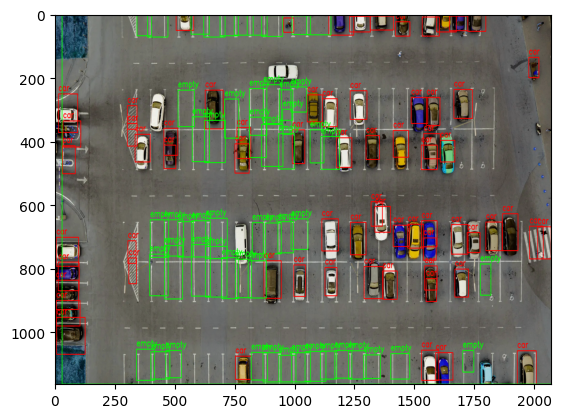

./data/unseen_test/test2.jpg

0: 416x640 16 emptys, 25 cars, 31.2ms
Speed: 0.0ms preprocess, 31.2ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
41 objects recognised


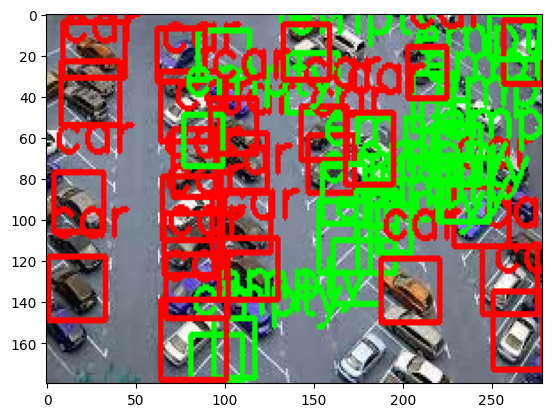

./data/unseen_test/test3.jpg

0: 416x640 8 emptys, 66 cars, 25.0ms
Speed: 3.5ms preprocess, 25.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 640)
74 objects recognised


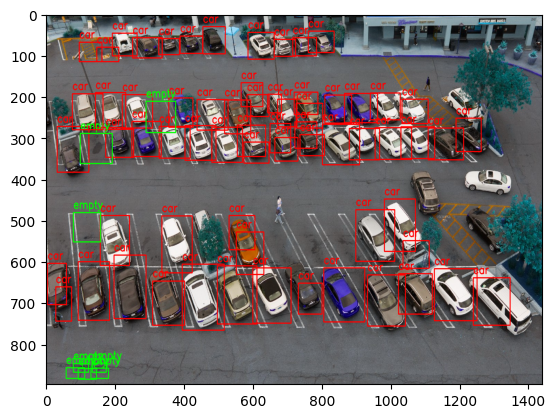

./data/unseen_test/test4.jpg

0: 352x640 6 emptys, 48 cars, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 6.0ms postprocess per image at shape (1, 3, 352, 640)
54 objects recognised


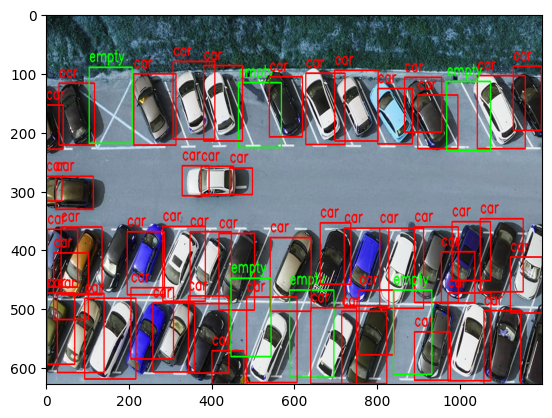

./data/unseen_test/test5.jpg

0: 448x640 24 emptys, 60 cars, 51.5ms
Speed: 3.0ms preprocess, 51.5ms inference, 8.0ms postprocess per image at shape (1, 3, 448, 640)
84 objects recognised


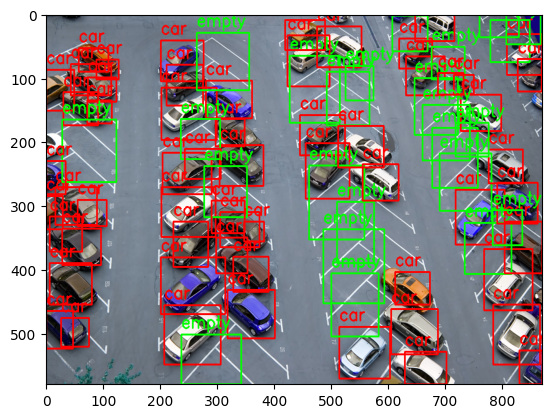

./data/unseen_test/test6.jpg

0: 448x640 107 emptys, 73 cars, 30.7ms
Speed: 0.0ms preprocess, 30.7ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)
180 objects recognised


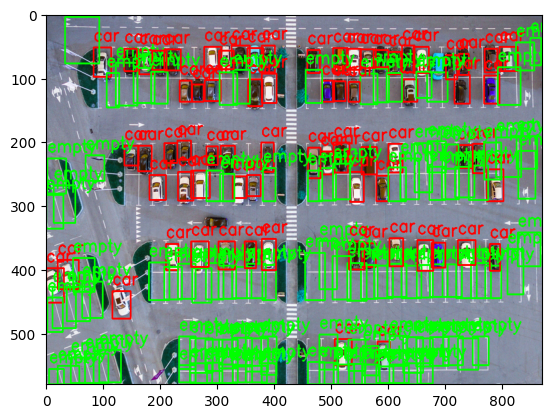

In [84]:
for img in images:
    print(img)
    plot_results(predict(img), img)

In [85]:
# Free RAM and VRAM
#gc.collect()
#tf.keras.backend.clear_session()